In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import nltk

In [3]:
books = pd.read_csv('BooksDataSet.csv')

In [4]:
#Data Cleaning
books = books[['book_id','book_name','genre','summary']]
books

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...
...,...,...,...,...
2995,10372180,White Death,Thriller,"A Novel from the NUMA files, A Kurt Austin Ad..."
2996,14504372,Venus with Pistol,Thriller,Gilbert Kemp is dealer specializing in antiqu...
2997,3617412,Blackwater,Thriller,"""How do you know when you're in too deep? Dav..."
2998,11320975,The Rainbow and the Rose,Thriller,The story concerns the life of Johnnie Pascoe...


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Fantasy'),
  Text(1, 0, 'Science Fiction'),
  Text(2, 0, 'Crime Fiction'),
  Text(3, 0, 'Historical novel'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Thriller')])

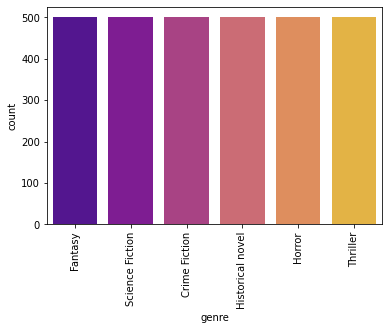

In [5]:
sn.countplot(x = books['genre'], palette='plasma')
plt.xticks(rotation='90')

In [6]:
books['summary'].iloc[1]

' As the book opens, Jason awakens on a school bus, unable to remember who or where he is, or anything about his past. He is sitting next to Piper McLean and Leo Valdez, who call him by name and say they are his girlfriend and best friend respectively. All three are part of a class field trip to the Grand Canyon, and after they arrive, a classmate Dylan turns into a Venti (Storm Spirit) and attacks the trio and their trip leader, Coach Gleeson Hedge. In the ensuing fight, Jason surprises everyone, including himself, when one of his coins turns into a sword which he uses to battle the storm spirits. Coach Hedge, who reveals himself to be a satyr during the fight, is taken captive by a fleeing spirit. After the battle, a flying chariot arrives to rescue the trio, but one of the people in it, Annabeth, is upset when she discovers that her missing boyfriend, Percy Jackson, is not there as she expected. Annabeth, seeking Percy, was told in a vision from the goddess Hera to look there for th

In [7]:
# cleaning text
def cleantext(text):
    
    #removing \
    
    text = re.sub("'\'","",text)
    
    # removing special symbol 
    text = re.sub("[^a-zA-Z]"," ",text)
    
    #removing whitespace
    text = ' '.join(text.split())
    
    #convert text to lowercase
    text = text.lower()
    
    return text

books['summary'] = books['summary'].apply(lambda x:cleantext(x))
books['summary'].iloc[1]

'as the book opens jason awakens on a school bus unable to remember who or where he is or anything about his past he is sitting next to piper mclean and leo valdez who call him by name and say they are his girlfriend and best friend respectively all three are part of a class field trip to the grand canyon and after they arrive a classmate dylan turns into a venti storm spirit and attacks the trio and their trip leader coach gleeson hedge in the ensuing fight jason surprises everyone including himself when one of his coins turns into a sword which he uses to battle the storm spirits coach hedge who reveals himself to be a satyr during the fight is taken captive by a fleeing spirit after the battle a flying chariot arrives to rescue the trio but one of the people in it annabeth is upset when she discovers that her missing boyfriend percy jackson is not there as she expected annabeth seeking percy was told in a vision from the goddess hera to look there for the guy with one shoe but this 

In [8]:
#Removing the stopwords
nltk.download('stopwords',download_dir='./')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
def removestopwords(text):
    removedstopword = [word for word in text.split() if word not in stop_words]
    return ' '.join(removedstopword)

books['summary'] = books['summary'].apply(lambda x:removestopwords(x))
books['summary'].iloc[1]

[nltk_data] Downloading package stopwords to ./...
[nltk_data]   Package stopwords is already up-to-date!


'book opens jason awakens school bus unable remember anything past sitting next piper mclean leo valdez call name say girlfriend best friend respectively three part class field trip grand canyon arrive classmate dylan turns venti storm spirit attacks trio trip leader coach gleeson hedge ensuing fight jason surprises everyone including one coins turns sword uses battle storm spirits coach hedge reveals satyr fight taken captive fleeing spirit battle flying chariot arrives rescue trio one people annabeth upset discovers missing boyfriend percy jackson expected annabeth seeking percy told vision goddess hera look guy one shoe turns jason shoe destroyed fight jason piper leo told demigods taken back camp half blood meet greek demigod children like leo revealed son hephaestus piper daughter aphrodite jason son zeus though hera tells champion jason later discovers full brother zeus demigod daughter thalia grace hunter artemis shortly arrive three given quest rescue hera captured set soon dis

In [9]:
import nltk
nltk.download('wordnet', download_dir='./')
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import  word_tokenize

lemma = WordNetLemmatizer()


def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

books['summary'] = books['summary'].apply(lambda x: lematizing(x))

[nltk_data] Downloading package wordnet to ./...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
books['summary'].iloc[1]

'book open jason awakens school bus unable remember anything past sitting next piper mclean leo valdez call name say girlfriend best friend respectively three part class field trip grand canyon arrive classmate dylan turn venti storm spirit attack trio trip leader coach gleeson hedge ensuing fight jason surprise everyone including one coin turn sword us battle storm spirit coach hedge reveals satyr fight taken captive fleeing spirit battle flying chariot arrives rescue trio one people annabeth upset discovers missing boyfriend percy jackson expected annabeth seeking percy told vision goddess hera look guy one shoe turn jason shoe destroyed fight jason piper leo told demigod taken back camp half blood meet greek demigod child like leo revealed son hephaestus piper daughter aphrodite jason son zeus though hera tell champion jason later discovers full brother zeus demigod daughter thalia grace hunter artemis shortly arrive three given quest rescue hera captured set soon discover enemy wor

In [11]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence
books['summary'] = books['summary'].apply(lambda x: stemming(x))

In [12]:
books['summary'].iloc[1]

'book open jason awaken school bu unabl rememb anyth past sit next piper mclean leo valdez call name say girlfriend best friend respect three part class field trip grand canyon arriv classmat dylan turn venti storm spirit attack trio trip leader coach gleeson hedg ensu fight jason surpris everyon includ one coin turn sword us battl storm spirit coach hedg reveal satyr fight taken captiv flee spirit battl fli chariot arriv rescu trio one peopl annabeth upset discov miss boyfriend perci jackson expect annabeth seek perci told vision goddess hera look guy one shoe turn jason shoe destroy fight jason piper leo told demigod taken back camp half blood meet greek demigod child like leo reveal son hephaestu piper daughter aphrodit jason son zeu though hera tell champion jason later discov full brother zeu demigod daughter thalia grace hunter artemi shortli arriv three given quest rescu hera captur set soon discov enemi work order gaea overthrow god quest encount thalia hunter look perci thalia

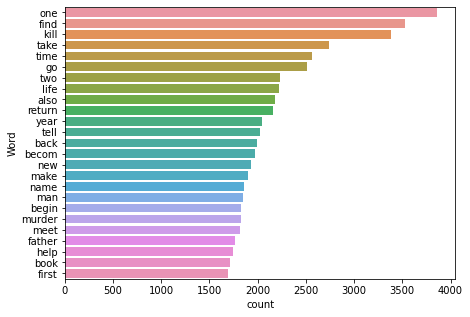

In [14]:
def showmostfrequentwords(text,no_of_words):
    
    allwords = ' '.join([char for char in text])
    allwords = allwords.split()
    fdist = nltk.FreqDist(allwords)
    
    wordsdf = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    df = wordsdf.nlargest(columns="count",n = no_of_words)
    
    plt.figure(figsize=(7,5))
    ax = sn.barplot(data=df,x = 'count',y = 'word')
    ax.set(ylabel = 'Word')
    plt.show()
    
    return wordsdf
    
    
# 25 most frequent words

wordsdf = showmostfrequentwords(books['summary'],25)

In [15]:
wordsdf.sort_values('count',ascending=False).head(10).style.background_gradient(cmap = 'plasma')

,word,count
242,one,3858
230,find,3533
240,kill,3380
153,take,2743
1143,time,2563
88,go,2509
38,two,2235
418,life,2224
415,also,2179
407,return,2158


In [23]:
##  Encoding

In [24]:
books_list = list(books['genre'].unique())
encode = [i for i in range(len(books_list))]
mapper = dict(zip(books_list,encode))
print(mapper)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}


In [25]:
books['genre'] = books['genre'].map(mapper)
books['genre'].unique()

array([0, 1, 2, 3, 4, 5])

In [26]:
## Model Building

In [37]:
## Part 2 Model Building
#TFDIF vectorizer

In [40]:
#Labeling each 'genre' with an unique number 
# train_test_split Split arrays or matrices into random train and test subsets split(X, y) test)size- 0.0 and 0.1 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(books['genre'])

X_train,X_test,y_train,y_test = train_test_split(books['summary']
                                                ,y,test_size=0.2,
                                                random_state=557)

X_train.shape,X_test.shape

((2400,), (600,))

In [41]:
#Performing tf-idf 

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))
xtest_tfidf = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [42]:
svc = SVC()
svc.fit(xtrain_tfidf,y_train)
svccpred = svc.predict(xtest_tfidf)
print(metrics.accuracy_score(y_test,svccpred))

0.775


In [44]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
mb = MultinomialNB()
mb.fit(xtrain_tfidf,y_train)
mbpred = mb.predict(xtest_tfidf)
print(metrics.accuracy_score(y_test,mbpred))

0.78


In [45]:
def test(text,model):
    
    text = cleantext(text)
    text = removestopwords(text)
    text = lematizing(text)
    text = stemming(text)
    
    text_vector = tfidf_vectorizer.transform([text])
    predicted = model.predict(text_vector)
    return predicted



ans = books['summary'].apply(lambda text:test(text,mb))

# printing the 
# print(list(mapper.keys())[list(mapper.values()).index(ans)])

ans

0       [0]
1       [0]
2       [0]
3       [0]
4       [0]
       ... 
2995    [1]
2996    [5]
2997    [5]
2998    [5]
2999    [5]
Name: summary, Length: 3000, dtype: object

In [46]:
predicted_genres = []
for i in range(len(ans)):
    
    index_val = ans[i][0]
    predicted_genres.append(list(mapper.keys())[list(mapper.values()).index(index_val)])
    

In [47]:
mapper

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [48]:
## mapping the training genre as well

newmap = dict([(value,key) for key,value in mapper.items()])
newmap

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [49]:
print(newmap)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}


In [50]:
books['Actual Genre'] = books['genre'].map(newmap)
books['Predicted_genre'] = np.array(predicted_genres)
books.head()

,book_id,book_name,genre,summary,Actual Genre,Predicted_genre
0,3248537,Drowned Wednesday,0,drown wednesday first truste among morrow day ...,0,0
1,27796919,The Lost Hero,0,book open jason awaken school bu unabl rememb ...,0,0
2,3910776,The Eyes of the Overworld,0,cugel easili persuad merchant fianosth attempt...,0,0
3,5969644,Magic's Promise,0,book open herald mage vanyel return countri va...,0,0
4,3173445,Taran Wanderer,0,taran gurgi return caer dallben follow event t...,0,0


In [51]:
books = books[['book_name','summary','Actual Genre','Predicted_genre']]
books

,book_name,summary,Actual Genre,Predicted_genre
0,Drowned Wednesday,drown wednesday first truste among morrow day ...,0,0
1,The Lost Hero,book open jason awaken school bu unabl rememb ...,0,0
2,The Eyes of the Overworld,cugel easili persuad merchant fianosth attempt...,0,0
3,Magic's Promise,book open herald mage vanyel return countri va...,0,0
4,Taran Wanderer,taran gurgi return caer dallben follow event t...,0,0
...,...,...,...,...
2995,White Death,novel numa file kurt austin adventur novel mai...,5,1
2996,Venus with Pistol,gilbert kemp dealer special antiqu gun london ...,5,5
2997,Blackwater,know deep davey alway live shadow older brothe...,5,5
2998,The Rainbow and the Rose,stori concern life johnni pasco retir commerci...,5,5


In [53]:
from collections import Counter
dict(Counter(books['Actual Genre'].values))

{0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500}

In [54]:
dict(Counter(books['Predicted_genre'].values))

{0: 462, 1: 536, 5: 477, 4: 504, 3: 501, 2: 520}

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

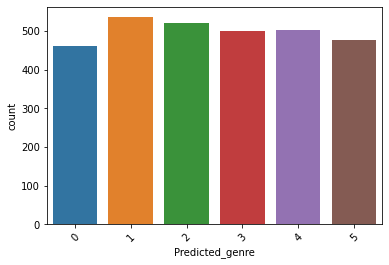

In [55]:
sn.countplot(x = books['Predicted_genre'])
plt.xticks(rotation = '45')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

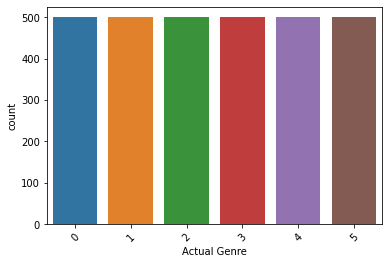

In [56]:
sn.countplot(x = books['Actual Genre'])
plt.xticks(rotation = '45')

In [57]:
# saving the model

import pickle
file = open('bookgenremodel.pkl','wb')
pickle.dump(mb,file)
file.close()

In [58]:
books['summary'].iloc[1]

'book open jason awaken school bu unabl rememb anyth past sit next piper mclean leo valdez call name say girlfriend best friend respect three part class field trip grand canyon arriv classmat dylan turn venti storm spirit attack trio trip leader coach gleeson hedg ensu fight jason surpris everyon includ one coin turn sword us battl storm spirit coach hedg reveal satyr fight taken captiv flee spirit battl fli chariot arriv rescu trio one peopl annabeth upset discov miss boyfriend perci jackson expect annabeth seek perci told vision goddess hera look guy one shoe turn jason shoe destroy fight jason piper leo told demigod taken back camp half blood meet greek demigod child like leo reveal son hephaestu piper daughter aphrodit jason son zeu though hera tell champion jason later discov full brother zeu demigod daughter thalia grace hunter artemi shortli arriv three given quest rescu hera captur set soon discov enemi work order gaea overthrow god quest encount thalia hunter look perci thalia

In [59]:
tfidf_vectorizer

TfidfVectorizer(max_df=0.8, max_features=10000)

In [60]:
file = open('tfdifvector.pkl','wb')
pickle.dump(tfidf_vectorizer,file)
file.close()

In [62]:
wordnet_down = nltk.download('wordnet',download_dir='./')
wordnet_down

[nltk_data] Downloading package wordnet to ./...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
nltk.download('stopwords',download_dir='./')

[nltk_data] Downloading package stopwords to ./...
[nltk_data]   Package stopwords is already up-to-date!


True